# SKlearn

Scikit-learn is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support-vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. (Wikipedia)

In [7]:
import sklearn

### Loading a sample data

In [101]:
from sklearn.datasets import fetch_california_housing

In [102]:
x_data, y_data = fetch_california_housing(return_X_y=True)

print(x_data) # properties of the houses
print("----------------------------")
print(y_data) # house prices

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
----------------------------
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [104]:
x_data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [105]:
what_we_want_to_predict = [
         [ 8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ],
         [ 5.3252    ,   24.        ,    6.98412698,    2.02380952,
        232.        ,    2.55555556,   57.88      , -102.23      ]
]

### Spliting the data into traning and test

In [106]:
from sklearn.model_selection import train_test_split

x, x_val, y, y_val = train_test_split(x_data , y_data, random_state=1 )

### Regression

In [107]:
# Regresion with Linear Regresion
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(x, y)
model1.predict(what_we_want_to_predict)

array([  4.16781256, -13.96170562])

In [108]:
# Regresion with K neighbors
from sklearn.neighbors import KNeighborsRegressor

model2 = KNeighborsRegressor()
model2.fit(x, y)
model2.predict(what_we_want_to_predict)

array([2.826802, 0.8848  ])

### Visualisation

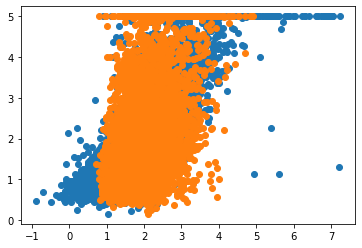

In [109]:
import matplotlib.pylab as plt

predicted1 = model1.predict(x_val)
predicted2 = model2.predict(x_val)

plt.scatter(predicted1, y_val)
plt.scatter(predicted2, y_val)

# Pipeline

Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods.

In [110]:
# We want to first normalize the data and then do the regression
# WHAT YOU SHOULD NOT DO
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(x,y)
x_new = scale.transform(x)

temp_model = KNeighborsRegressor().fit(x_new,y)
# And so on
# DO NOT DO LIKE THIS

In [111]:
# WHAT YOU SHOULD DO
from sklearn.pipeline import Pipeline

pipe1 = Pipeline([
                  ("Scale", StandardScaler()),
                  ("Model", KNeighborsRegressor())
])

pipe1.fit(x, y)
pipe1.predict(what_we_want_to_predict)

array([4.661406, 0.5306  ])

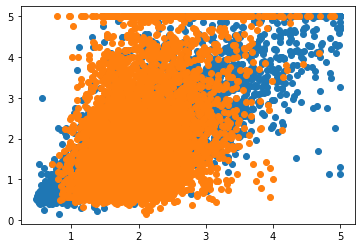

In [112]:
predicted3 = pipe1.predict(x_val)
predicted2 = model2.predict(x_val)

plt.scatter(predicted3, y_val)
plt.scatter(predicted2, y_val)

## NLP

In [118]:
from sklearn.datasets import fetch_20newsgroups

# ''' http://qwone.com/~jason/20Newsgroups/
# The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents,
# partitioned (nearly) evenly across 20 different newsgroups. To the best of our knowledge,
# it was originally collected by Ken Lang, probably for his paper “Newsweeder: Learning to filter netnews,”
# though he does not explicitly mention this collection.
# The 20 newsgroups collection has become a popular data set for experiments in text applications of machine learning techniques,
# such as text classification and text clustering.
# '''


# we only work in 4 catagories categories out of the 20 available in the dataset
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med'] 
              
twenty_train = fetch_20newsgroups(
    subset='train', categories=categories, shuffle=True, random_state=42)

In [123]:
print(len(twenty_train.data))
print()
print("\n".join(twenty_train.data[0].split("\n")[:3])) # print the fist line
print()
print(twenty_train.target_names[twenty_train.target[0]]) # first category
# We should use 'target_names' because the original caregories are number
# it is shown below

2257

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton

comp.graphics


In [129]:
print(twenty_train.target[:5]) # category for each
print([twenty_train.target_names[i] for i in twenty_train.target[:5]])

[1 1 3 3 3]
['comp.graphics', 'comp.graphics', 'soc.religion.christian', 'soc.religion.christian', 'soc.religion.christian']


## Extracting features from text files
### Bags of words



1. Assign a fixed integer id to each word occurring in any document of the 
training set (for instance by building a dictionary from words to integer indices).
2. or each document #i, count the number of occurrences of each word w and store it in X[i, j] as the value of feature #j where j is the index of word w in the dictionary.



In [130]:
from sklearn.feature_extraction.text import CountVectorizer
# Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer,
# which builds a dictionary of features and transforms documents to feature vectors

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(2257, 35788)

In [133]:
count_vect.vocabulary_.get('car')

7860

### tf–idf

 tf–idf for “Term Frequency times Inverse Document Frequency”.


In [139]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tfidf = tf_transformer.transform(X_train_counts)
X_train_tfidf.shape

(2257, 35788)

### Training a classifier

#### naive bayes

In [137]:
# Making the model 

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [143]:
# using the model

docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tfidf)

print(predicted)
print([twenty_train.target_names[i] for i in predicted])


[3 1]
['soc.religion.christian', 'comp.graphics']


In [147]:
# How to do it with pipline!? Do this all like this

text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

text_clf.fit(twenty_train.data, twenty_train.target)

predicted = text_clf.predict(docs_new)
print(predicted)
print([twenty_train.target_names[i] for i in predicted])


[3 1]
['soc.religion.christian', 'comp.graphics']


### Accuracy

In [148]:
import numpy as np

twenty_test = fetch_20newsgroups(subset='test',
    categories=categories, shuffle=True, random_state=42)

docs_test = twenty_test.data
predicted = text_clf.predict(docs_test)
np.mean(predicted == twenty_test.target)

0.8348868175765646

In [ ]:
# resources: https://github.com/koaning/calm-notebooks/blob/master/scikit-learn/scikit-learn.ipynb and https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html